### Python modules used for geospatial data.<br/>   
[RasterIo](https://rasterio.readthedocs.io/): Rasterio reads and writes GeoTIFF formats to organize and store gridded raster datasets such as satellite imagery and terrain models. and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.<br/>   
[Numpy](https://numpy.org/): NumPy is the fundamental package for scientific computing in Python Geospatial libraries return the Satellite images in Numpy N-dimensional arrays format.<br/>  
[Matplotlib](https://matplotlib.org/)  Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

In [25]:
import rasterio as rio
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### Sentinel 2 Bands Description.    
|    Sentinel2 Bands     | Central Wavelength(μm)           | Resolution(m)  |
| ------------- |:-------------:| -----:|
| Band 1 - Coastal aerosole        | 0.443 | 60 |
| Band 2 - Blue      | 0.490      |   10 |
| Band 3 - Green | 0.560      |    10 |
| Band 4 - Red        | 0.665 | 10 |
| Band 5 - Vegetation Red Edge      | 0.705      |   20 |
| Band 6 - Vegetation Red Edge | 0.740      |    20 |
| Band 7 - Vegetation Red Edge       | 0.783 | 20 |
| Band 8 - NIR      | 0.842      |   10 |
| Band 8A - Green | 0.865      |    20 |
| Band 9 - Water vapour       | 0.945 | 60 |
| Band 10 - SWIR - Cirrus      | 1.375      |   60 |
| Band 11 - SWIR | 1.610      |    20 |
| Band 12 - SWIR | 2.190      |    20 |

### Landsat 8 Bands Description.    
|    Sentinel2 Bands     | Central Wavelength(μm)           | Resolution(m)  |
| ------------- |:-------------:| -----:|
| Band 1 - Coastal aerosole        | 0.443 | 30 |
| Band 2 - Blue      | 0.490      |   30 |
| Band 3 - Green | 0.560      |    30 |
| Band 4 - Red        | 0.665 | 30 |
| Band 5 - NIR      | 0.842       |   30 |
| Band 6 - SWIR 1 | 1.610      |    30 |
| Band 7 - SWIR 2    | 2.190 | 30 |
| Band 8 - Panchromatic      | 0.640     |   15 |
| Band 9 - Cirrus       | 1.375 | 30 |
| Band 10 - Thermal Infrared 1    |10.9      |   100 |
| Band 11 - SWIR | 12.00      |    100 |

Note: Usually the satellite data will be in two formats stacking all the bands into one file or one band for each file In thos example i am using stacking into one file.  

In [43]:
#read_band Function reads tif files(tif files are the ) and retuns the raster data in ndarry format.  
def read_band(band,index):
    with rio.open(band) as src:
        band = src.read(index).astype('float64')
    return band

def ndwicalc(B8, B4):
    ndwi = ((B8- B4) * 1.0) / ((B8+ B4) * 1.0)
    ndwi = ndwi.astype(np.float32)
    return ndwi

def rgbcalc(red,green,blue):
    rgb = np.dstack([(red/10000)*4, (green/10000)*4, (blue/10000)*4])
    rgb = rgb.astype(np.float32)
    return rgb


#generatepng_ph function reads the raster data and generates image we use matplotlib to generate image. 
def generatepng_ndvi(values):
    cmap = mpl.colors.ListedColormap(["#A50026", "#D73027", "#F46D43", "#FDAE61", "#FEE08B", "#FFFFBF", "#D9EF8B", "#A6D96A", "#66BD63", "#1A9850", "#006837"])
    bounds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(values, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.show()
    return

def generatepng_rgb(values):
    plt.imshow(values)
    plt.axis('off')
    plt.show()
    return



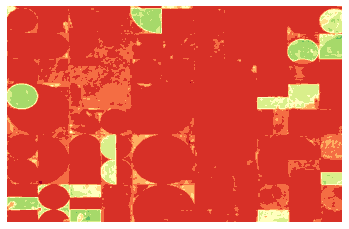

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


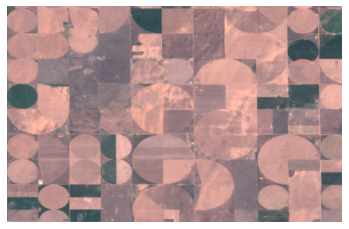

In [51]:
date1 = "./data/field1/2020-04-15_bands_clipped.tif"
B4 = read_band(date1,4)
B3 = read_band(date1,3) 
B2 = read_band(date1,2)
B8 = read_band(date1,8)
ndvi = ndwicalc(B8,B4)
generatepng_ndvi(ndvi)
rgb = rgbcalc(B4,B3,B2)
generatepng_rgb(rgb)

In [57]:
date2 = "./data/field1/2020-05-05_bands_clipped.tif"
B4 = read_band(date2,4)
B3 = read_band(date2,3) 
B2 = read_band(date2,2)
B8 = read_band(date2,8)
ndvi2 = ndwicalc(B8,B4)
rgb2 = rgbcalc(B4,B3,B2)

In [58]:
def generatepng_annomaly(values):
    cmap = mpl.colors.ListedColormap(["#A50026","#000000", "#006837"])
    bounds = [-1,-0.0001,1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    plt.imshow(values, cmap=cmap, norm=norm)
    plt.axis('off')
    plt.show()
    return

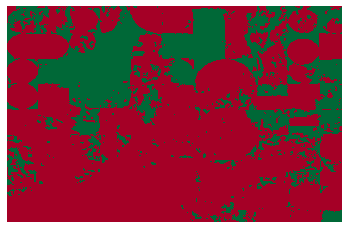

In [59]:
change = ndvi2 - ndvi
generatepng_annomaly(change)